Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

* positiver Trend: corr > 0 (Height --> Volume)
* zunehmende Streuung mit steigender Höhe (steigende Varianz)

(b) Describe the relationship between volume and diameter of these trees.  

* positiver Trend
* corr nahe 1

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

* Diameter ist der bessere Prediktor
    * Die Streuung zu einem linearen Modell ist deutlich geringer

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sms

df = pd.read_csv('data/utils.csv')
df.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

In [43]:
df['T_new'] = np.sqrt(np.abs(df['Average Monthly Temperature']-65))

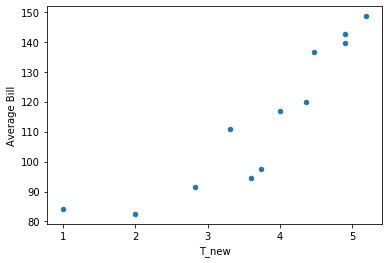

In [44]:
df.plot.scatter(y='Average Bill', x='T_new');

From visual inspection, what is the relationship between the variables?

* polynomialer (quadratische) Zusammenhang --> Parabel

Fit a simple linear regression using OLS.  

In [16]:
X = df['Average Monthly Temperature']
X = sms.add_constant(X)
X.head()

/Users/bendixhass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Average Monthly Temperature
0,1.0,38
1,1.0,45
2,1.0,49
3,1.0,57
4,1.0,69


In [28]:
y = df['Average Bill']

model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 02 Mar 2020   Prob (F-statistic):              0.261
Time:                        14:43:53   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         143.6228     25.995      5.525      0.000      85.701     201.544
Average Monthly Temperature    -0.4799      0.403     -1.190      0.261      -1.378       0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculate and interpret the value of $R^2$.  

$R^2 = 0.124$

Interpret the intercept and slope coefficients in terms a home owner would understand.

In [29]:
print('Intercept: ', intercept, '\nSlope: ', slope)

Intercept:  143.62280506779285 
Slope:  -0.4798844187597244


What is the 95% confidence interval for the intercept?  

In [30]:
results.conf_int(alpha=0.05, cols=None)

,0,1
const,85.701257,201.544353
Average Monthly Temperature,-1.378325,0.418556


Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

* P-value mit 0.261 deutlich zu groß

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [36]:
pred = results.get_prediction([1, 120])
pred

In [32]:
pred.predicted_mean

array([86.03667482])

In [1]:
-1.684e4 + 2000*266.9

516960.0

<br>
<br> 
<br>

----